# Import required libraries for dataframe and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar


## Read the data using pandas

In [2]:
retail = pd.read_csv(r"C:\Users\HP\Music\customer segmentation of online reatil\OnlineRetail1.csv",  encoding=('ISO-8859-1'))

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,01-04-2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,01-04-2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,01-04-2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,01-04-2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,01-04-2011 10:00,1.25,13313.0,United Kingdom


In [4]:
retail.shape

(499428, 8)

In [5]:
retail.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
499418,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12-09-2011 12:50,3.75,12680.0,France
499419,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12-09-2011 12:50,3.75,12680.0,France
499420,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12-09-2011 12:50,1.95,12680.0,France
499421,581587,22629,SPACEBOY LUNCH BOX,12,12-09-2011 12:50,1.95,12680.0,France
499422,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12-09-2011 12:50,4.15,12680.0,France
499423,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
499424,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
499425,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
499426,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
499427,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499428 non-null  object 
 1   StockCode    499428 non-null  object 
 2   Description  498099 non-null  object 
 3   Quantity     499428 non-null  int64  
 4   InvoiceDate  499428 non-null  object 
 5   UnitPrice    499428 non-null  float64
 6   CustomerID   379979 non-null  float64
 7   Country      499428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [7]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,499428.000000,499428.000000,379979.000000
mean,9.679517,4.481693,15271.312675
std,226.515728,92.194767,1710.629829
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


# Data cleaning

In [8]:
#check the null values in percentage
df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     23.92
Country         0.00
dtype: float64

In [9]:
#drop the missing value
retail.dropna(inplace= True)

In [10]:
retail.shape

(379979, 8)

## read the data and change the data type of the column 

In [11]:
#the customer id of the data type is change in str format 
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379979 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    379979 non-null  object 
 1   StockCode    379979 non-null  object 
 2   Description  379979 non-null  object 
 3   Quantity     379979 non-null  int64  
 4   InvoiceDate  379979 non-null  object 
 5   UnitPrice    379979 non-null  float64
 6   CustomerID   379979 non-null  object 
 7   Country      379979 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.1+ MB


In [13]:
# the invoice date is change  object to date time format
retail.InvoiceDate=pd.to_datetime(retail.InvoiceDate)

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379979 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 26.1+ MB


In [15]:
#  all the distinct values in each column.
print(retail.nunique())

InvoiceNo      20482
StockCode       3612
Description     3800
Quantity         425
InvoiceDate    18909
UnitPrice        601
CustomerID      4244
Country           36
dtype: int64


## Adding column 

In [16]:
retail['Total'] = retail['Quantity']*retail['UnitPrice']
retail['Year'] = pd.DatetimeIndex(retail['InvoiceDate']).year
retail['Month'] = pd.DatetimeIndex(retail['InvoiceDate']).month
retail['Day'] =  pd.DatetimeIndex(retail['InvoiceDate']).day
retail['Date'] = pd.DatetimeIndex(retail['InvoiceDate']).date
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,Date
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011,1,4,2011-01-04
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011,1,4,2011-01-04
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011,1,4,2011-01-04


# EDA (Exploratory data analysis)

In [17]:
#Monthly revenue is sum up all 'Total sales' in a month
monthly = retail.groupby(['Year', 'Month'])['Total'].sum()
monthly = monthly.to_frame()
monthly = monthly.reset_index()

In [18]:
print(monthly)

    Year  Month        Total
0   2011      1   475074.380
1   2011      2   436546.150
2   2011      3   579964.610
3   2011      4   426047.851
4   2011      5   648251.080
5   2011      6   608013.160
6   2011      7   574238.481
7   2011      8   616368.000
8   2011      9   931440.372
9   2011     10   974603.590
10  2011     11  1132407.740
11  2011     12   342506.380


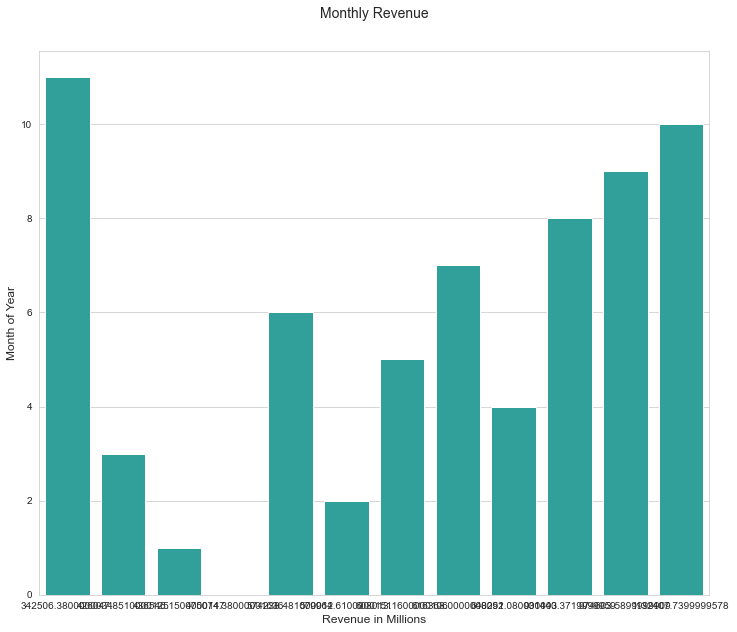

In [19]:
sns.set_style('whitegrid')
h = sns.barplot(x = 'Total', y = monthly.index, data = monthly, color = 'lightseagreen')
h.figure.set_size_inches(12,10)
h.set_xlabel('Revenue in Millions', size = 12)
h.set_ylabel('Month of Year', size = 12)
h.set_title('Monthly Revenue', size = 14, y = 1.05)
plt.show()

In [20]:
df = retail.groupby(['Year','Month']).Total.cumsum()

print (df)

0             19.50
1             30.00
2             40.50
3             51.00
4             63.50
            ...    
499423    342445.73
499424    342458.33
499425    342474.93
499426    342491.53
499427    342506.38
Name: Total, Length: 379979, dtype: float64


In [21]:
#monthly percent change in growth rate
monthly['monthlygrowth']=monthly['Total'].pct_change()

In [22]:
monthly

,Year,Month,Total,monthlygrowth
0,2011,1,475074.380,NaN
1,2011,2,436546.150,-0.081099
2,2011,3,579964.610,0.328530
3,2011,4,426047.851,-0.265390
4,2011,5,648251.080,0.521545
5,2011,6,608013.160,-0.062072
6,2011,7,574238.481,-0.055549
7,2011,8,616368.000,0.073366
8,2011,9,931440.372,0.511176
9,2011,10,974603.590,0.046340


In [23]:
monthly['monthlygrowth']=monthly['monthlygrowth'].fillna(0)

In [24]:
monthly

,Year,Month,Total,monthlygrowth
0,2011,1,475074.380,0.000000
1,2011,2,436546.150,-0.081099
2,2011,3,579964.610,0.328530
3,2011,4,426047.851,-0.265390
4,2011,5,648251.080,0.521545
5,2011,6,608013.160,-0.062072
6,2011,7,574238.481,-0.055549
7,2011,8,616368.000,0.073366
8,2011,9,931440.372,0.511176
9,2011,10,974603.590,0.046340


Text(0.5, 1.0, 'monthlygrowth')

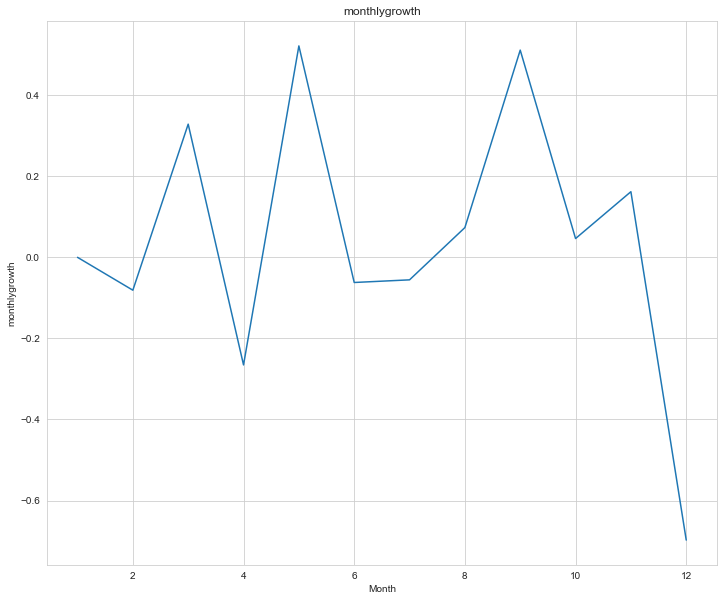

In [25]:
fig=plt.subplots(figsize=(12,10))
Mg = sns.lineplot(x = 'Month', y = 'monthlygrowth', data= monthly, sort= False)
Mg.set_title('monthlygrowth')

In [26]:
#Revenue by countries is sum up of all 'Total sales' for each country.
revenue_per_country = retail.groupby(['Country'])['Total'].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head()

,Total
Country,
United Kingdom,6.284074e+06
Netherlands,2.758771e+05
EIRE,2.424596e+05
Germany,2.071354e+05
France,1.871375e+05


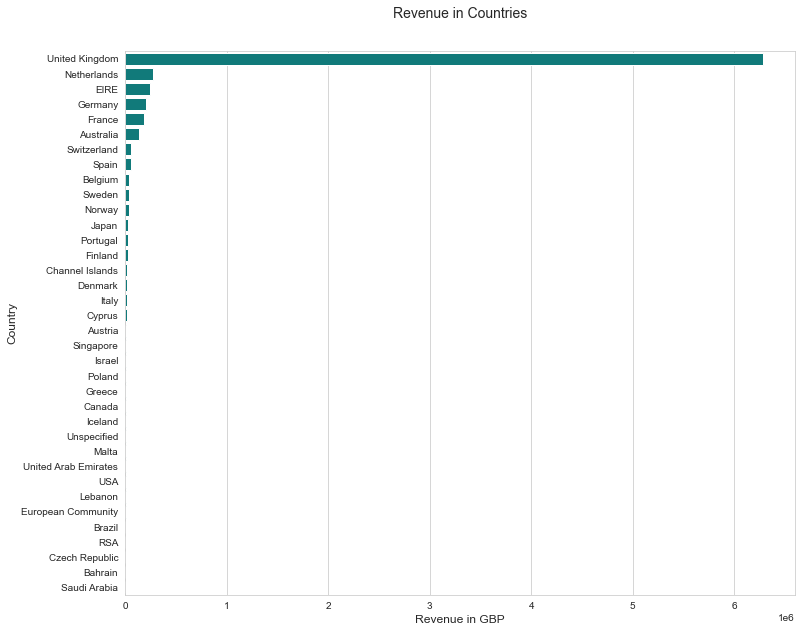

In [27]:
g = sns.barplot(x = 'Total', y = revenue_per_country.index , data =revenue_per_country, color = 'darkcyan')
g.figure.set_size_inches(12,10)
g.set_xlabel('Revenue in GBP', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Revenue in Countries', size = 14, y = 1.05)
plt.show()

In [28]:
#revenue per countries where the UK is outside
country = revenue_per_country[revenue_per_country.index != 'United Kingdom']

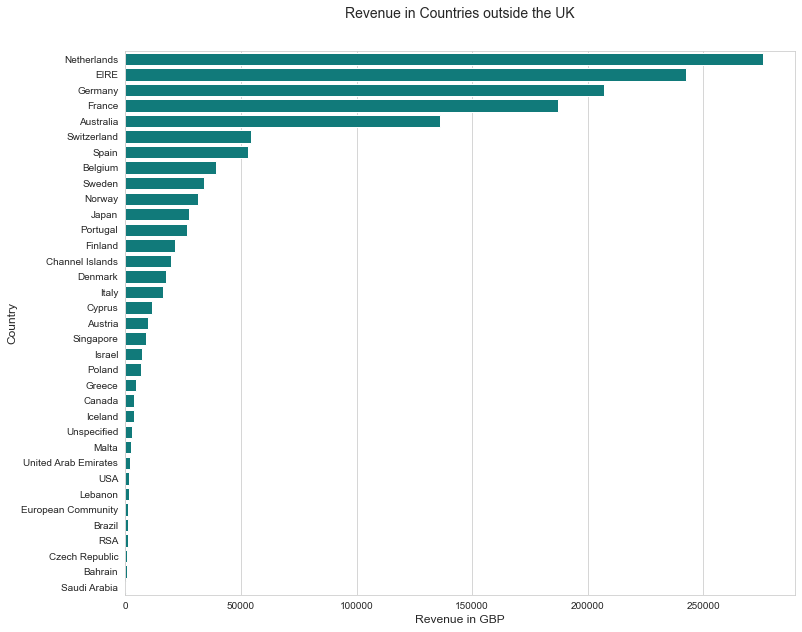

In [29]:

g = sns.barplot(x = 'Total', y = country.index , data = country, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('Revenue in GBP', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Revenue in Countries outside the UK', size = 14, y = 1.05)
plt.show()

In [30]:
#active customer per countries
freg = retail.groupby(['Country'])['CustomerID'].nunique().sort_values()
freg= freg.to_frame()
freg.head()

,CustomerID
Country,
Brazil,1
Singapore,1
Saudi Arabia,1
RSA,1
Czech Republic,1


In [31]:
print(freg)

                      CustomerID
Country                         
Brazil                         1
Singapore                      1
Saudi Arabia                   1
RSA                            1
Czech Republic                 1
European Community             1
Lebanon                        1
Iceland                        1
United Arab Emirates           2
Bahrain                        2
Malta                          2
Israel                         3
EIRE                           3
USA                            4
Greece                         4
Unspecified                    4
Canada                         4
Poland                         6
Japan                          8
Netherlands                    8
Sweden                         8
Cyprus                         8
Channel Islands                8
Australia                      9
Denmark                        9
Austria                       10
Norway                        10
Finland                       12
Italy     

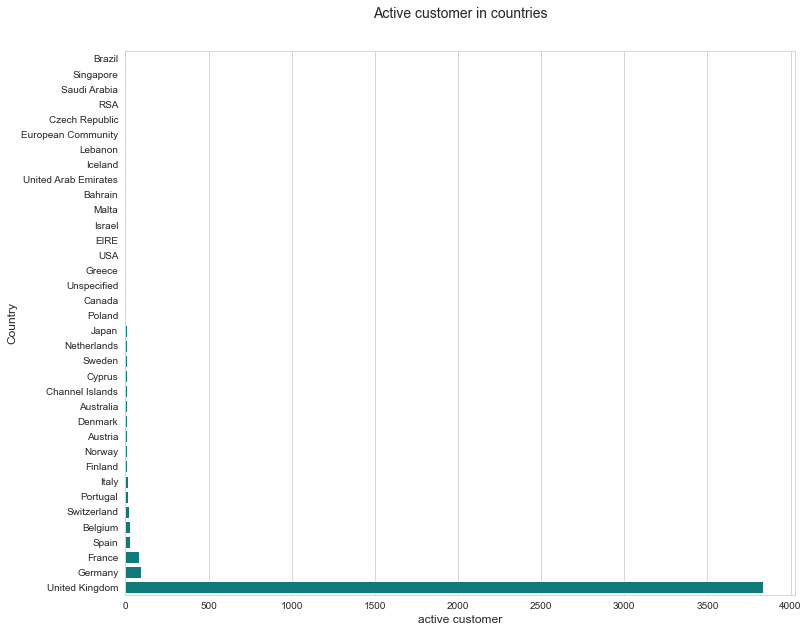

In [32]:
g = sns.barplot(x = 'CustomerID', y = freg.index , data = freg, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('active customer', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Active customer in countries', size = 14, y = 1.05)
plt.show()

In [33]:
#active customer per countries where UK is outside 
freg1= freg[freg.index != 'United Kingdom']

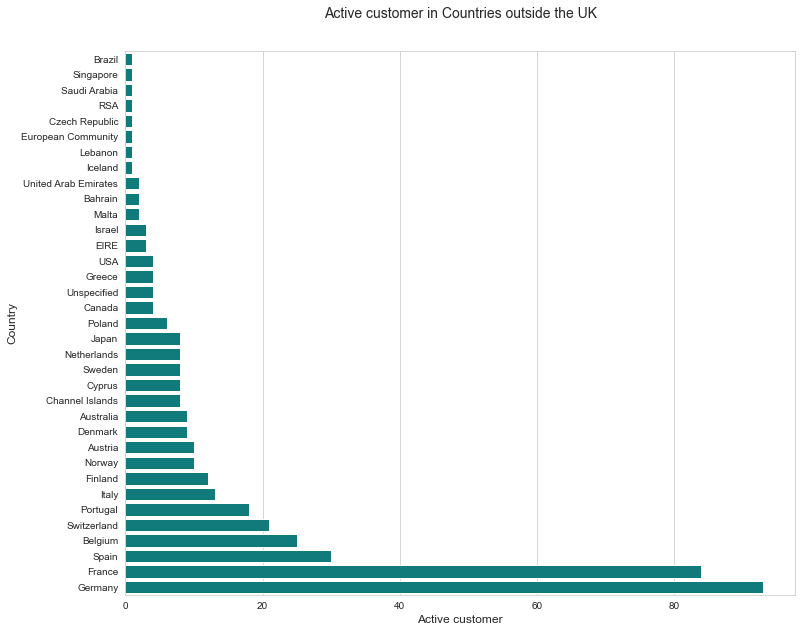

In [34]:
g = sns.barplot(x = 'CustomerID', y = freg1.index , data = freg1, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('Active customer', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Active customer in Countries outside the UK', size = 14, y = 1.05)
plt.show()

In [35]:
#active customer per month wise 
detail = retail.groupby(['Month'])['CustomerID'].nunique()
detail=detail.to_frame()
detail

,CustomerID
Month,
1,783
2,798
3,1020
4,899
5,1079
6,1051
7,993
8,980
9,1302


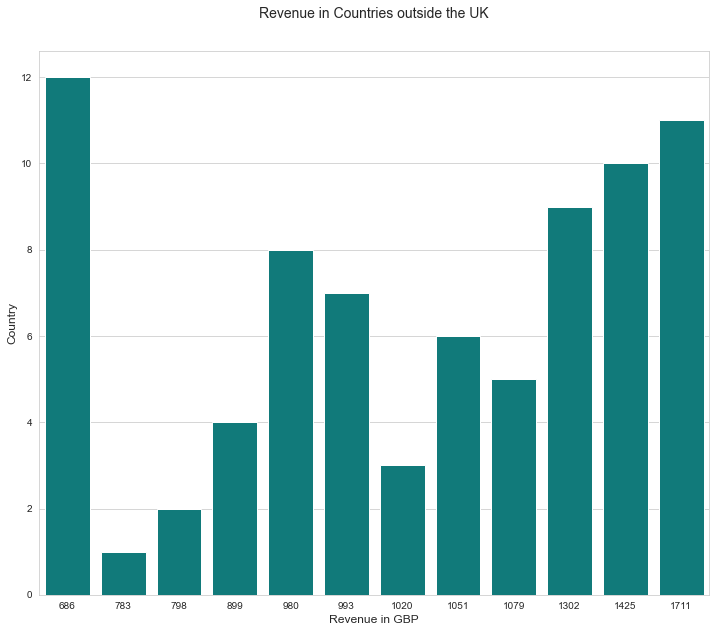

In [36]:
g = sns.barplot(x = 'CustomerID', y = detail.index , data = detail, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('Revenue in GBP', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Revenue in Countries outside the UK', size = 14, y = 1.05)
plt.show()

<AxesSubplot:title={'center':'active customers per month'}, xlabel='Month'>

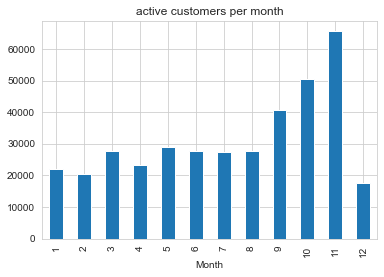

In [37]:
retail.groupby(['Month']).CustomerID.count().plot(kind='bar', title='active customers per month')

<AxesSubplot:title={'center':'Total SKU per country'}, xlabel='Country'>

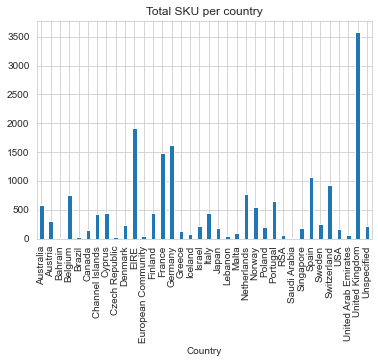

In [38]:
retail.groupby(['Country']).StockCode.nunique().plot(kind='bar', title='Total SKU per country')

<AxesSubplot:title={'center':'Total SKU per month'}, xlabel='Month'>

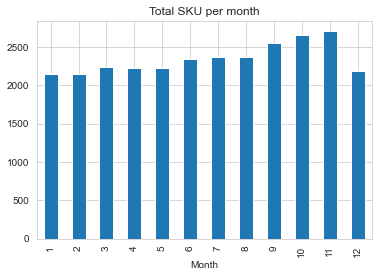

In [39]:
retail.groupby(['Month']).StockCode.nunique().plot(kind='bar', title='Total SKU per month')

<AxesSubplot:title={'center':'total order per month'}, xlabel='Month'>

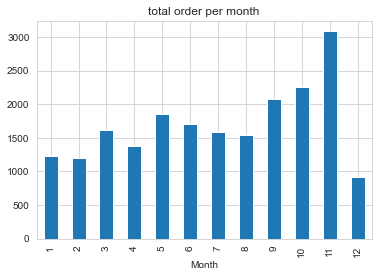

In [40]:
retail.groupby(['Month']).InvoiceNo.nunique().plot(kind='bar', title='total order per month')

<AxesSubplot:title={'center':'total order per country'}, xlabel='Country'>

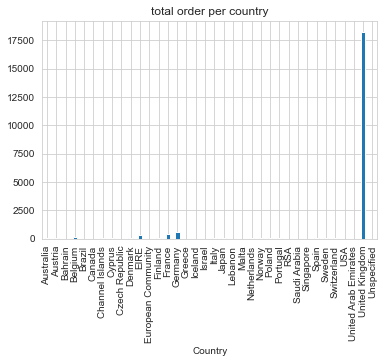

In [41]:
retail.groupby(['Country']).InvoiceNo.nunique().plot(kind='bar', title='total order per country')

In [42]:
skip= retail[retail.Country != 'United Kingdom']

<AxesSubplot:title={'center':'total order per country without UK'}, xlabel='Country'>

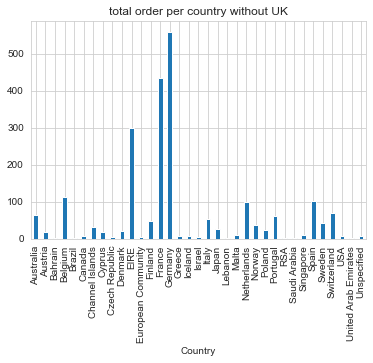

In [43]:
skip.groupby(['Country']).InvoiceNo.nunique().plot(kind='bar', title='total order per country without UK')

In [44]:
# monthly average revenue per order
data_avg_revenue = retail.groupby('Month')['Total'].mean().reset_index()

In [45]:
data_avg_revenue

,Month,Total
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


Text(0.5, 1.0, 'average revenue')

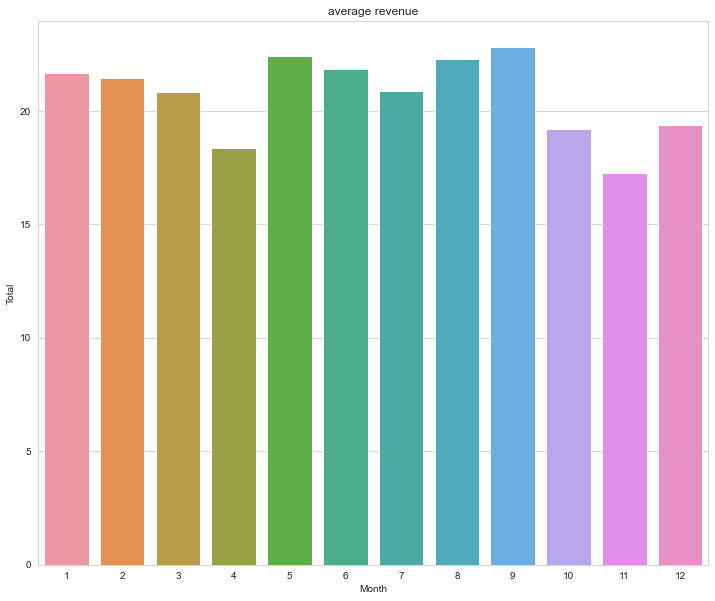

In [46]:
fig=plt.subplots(figsize=(12,10))
dr = sns.barplot(x = 'Month', y = 'Total', data=data_avg_revenue)
dr.set_title('average revenue')

In [47]:
#retention rate
new_customer= retail.groupby('CustomerID').Date.min().reset_index()

In [48]:
new_customer

,CustomerID,Date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [49]:
new_customer.columns = ['CustomerID', 'firstpurchasedate']

In [50]:
new_customer['firstpurchasemonth'] = new_customer['firstpurchasedate'].map(lambda Date: Date.month)

In [51]:
new_customer

,CustomerID,firstpurchasedate,firstpurchasemonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [52]:
retail = pd.merge(retail,new_customer, on='CustomerID')

In [53]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,Date,firstpurchasedate,firstpurchasemonth
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.50,2011,1,4,2011-01-04,2011-01-04,1
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.50,2011,1,4,2011-01-04,2011-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,2011,12,9,2011-12-09,2011-12-09,12
379975,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,9,2011-12-09,2011-12-09,12
379976,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,9,2011-12-09,2011-12-09,12
379977,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,2011,12,9,2011-12-09,2011-12-09,12


In [54]:
retail['customertype'] = 'new'
retail.loc[retail['Month']>retail['firstpurchasemonth'],'customertype'] = 'existing'

In [55]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,Date,firstpurchasedate,firstpurchasemonth,customertype
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.50,2011,1,4,2011-01-04,2011-01-04,1,new
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1,new
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1,new
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.50,2011,1,4,2011-01-04,2011-01-04,1,new
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.50,2011,1,4,2011-01-04,2011-01-04,1,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,2011,12,9,2011-12-09,2011-12-09,12,new
379975,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,9,2011-12-09,2011-12-09,12,new
379976,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,2011,12,9,2011-12-09,2011-12-09,12,new
379977,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,2011,12,9,2011-12-09,2011-12-09,12,new


In [56]:
customertype_revenue = retail.groupby(['Month','customertype'])['Total'].sum().reset_index()

In [57]:
customertype_revenue


,Month,customertype,Total
0,1,new,475074.380
1,2,existing,222645.040
2,2,new,213901.110
3,3,existing,356562.750
4,3,new,223401.860
5,4,existing,283526.090
6,4,new,142521.761
7,5,existing,518892.810
8,5,new,129358.270
9,6,existing,508100.200


Text(0.5, 1.0, 'revenue of customertype')

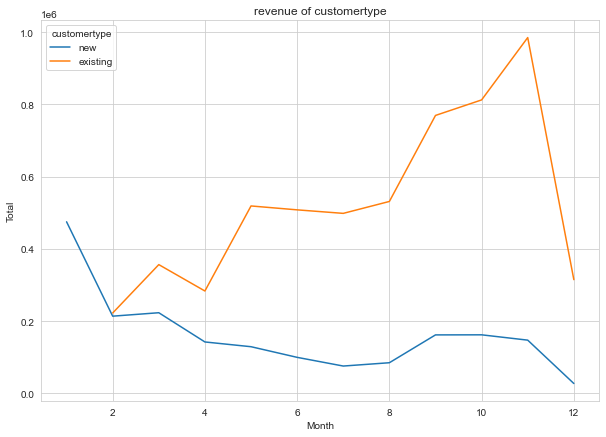

In [58]:
fig = plt.subplots(figsize = (10,7))
ct = sns.lineplot(x='Month' , y= 'Total',data =customertype_revenue, hue= 'customertype')
ct.set_title('revenue of customertype')

In [59]:
retail_user_purchase = retail.groupby(['CustomerID','Month'])['Total'].sum().reset_index()
retail_user_purchase

,CustomerID,Month,Total
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
12722,18283.0,10,114.65
12723,18283.0,11,651.56
12724,18283.0,12,208.00
12725,18287.0,5,765.28


In [60]:
data_user_retention = pd.crosstab(retail_user_purchase['CustomerID'],retail_user_purchase['Month']).reset_index()

In [61]:
data_user_retention

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4240,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4241,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4242,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


# RFM

In [62]:
from datetime import timedelta

In [63]:
recent_date = retail['InvoiceDate'].max()+timedelta(days=1)

In [64]:
recent_date

Timestamp('2011-12-10 12:50:00')

In [65]:
retail_RFM = retail.groupby('CustomerID').agg({'InvoiceDate':lambda x:(retail['InvoiceDate'].max().date()-x.max().date()).days,'InvoiceNo':'count','Total':'sum'})

In [66]:
retail_RFM

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,151,3598.21
12348.0,75,14,904.44
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [67]:
retail_RFM.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Total':'Monetary' },inplace= True)

In [68]:
retail_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,151,3598.21
12348.0,75,14,904.44
12349.0,18,73,1757.55
12350.0,310,17,334.40


(array([1833.,  761.,  417.,  231.,  198.,  196.,  161.,  184.,  137.,
         126.]),
 array([  0. ,  33.9,  67.8, 101.7, 135.6, 169.5, 203.4, 237.3, 271.2,
        305.1, 339. ]),
 <BarContainer object of 10 artists>)

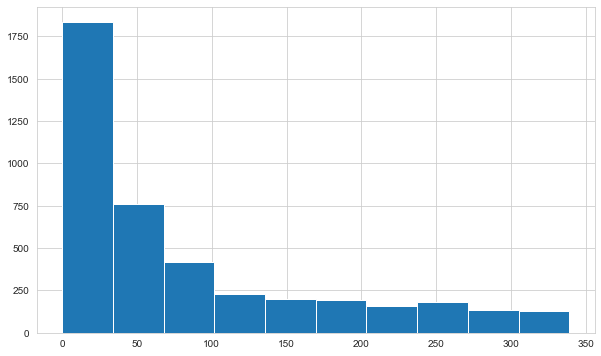

In [69]:
fig = plt.figure(figsize=(10, 6))
plt.hist(retail_RFM['Recency'])

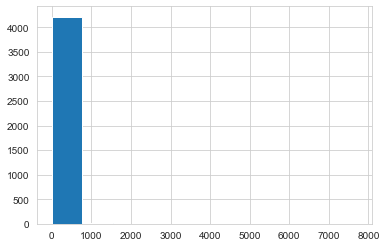

In [70]:
plt.hist(retail_RFM['Frequency']);

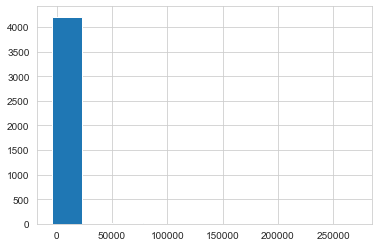

In [71]:
plt.hist(retail_RFM['Monetary']);

In [72]:
r_labels = range(4,0,-1); f_labels = range(1,5);


In [73]:
r_group = pd.qcut(retail_RFM['Recency'],q = 4 , labels= r_labels)
f_group = pd.qcut(retail_RFM['Frequency'],q = 4, labels= f_labels, duplicates = 'drop')


In [74]:
retail_RFM = retail_RFM.assign(R=r_group.values, F =f_group.values)

In [75]:
retail_RFM

,Recency,Frequency,Monetary,R,F
CustomerID,,,,,
12346.0,325,2,0.00,1,1
12347.0,2,151,3598.21,4,4
12348.0,75,14,904.44,2,1
12349.0,18,73,1757.55,3,3
12350.0,310,17,334.40,1,1
...,...,...,...,...,...
18280.0,277,10,180.60,1,1
18281.0,180,7,80.82,1,1
18282.0,7,13,176.60,4,1


In [76]:
m_labels = range(1,5)
m_group = pd.qcut(retail_RFM['Monetary'],q = 4 , labels= m_labels)

In [77]:
retail_RFM = retail_RFM.assign(R=r_group.values, F =f_group.values, M = m_group)

In [78]:
retail_RFM

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,2,0.00,1,1,1
12347.0,2,151,3598.21,4,4,4
12348.0,75,14,904.44,2,1,3
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1
18281.0,180,7,80.82,1,1,1
18282.0,7,13,176.60,4,1,1


In [79]:
def rfm_concat(x): return str(x['R'])+ str(x['F'])+str(x['M'])
retail_RFM['RFM_concat'] = retail_RFM.apply(rfm_concat, axis=1)

In [80]:
retail_RFM

,Recency,Frequency,Monetary,R,F,M,RFM_concat
CustomerID,,,,,,,
12346.0,325,2,0.00,1,1,1,1.01.01.0
12347.0,2,151,3598.21,4,4,4,4.04.04.0
12348.0,75,14,904.44,2,1,3,2.01.03.0
12349.0,18,73,1757.55,3,3,4,3.03.04.0
12350.0,310,17,334.40,1,1,2,1.01.02.0
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,1.01.01.0
18281.0,180,7,80.82,1,1,1,1.01.01.0
18282.0,7,13,176.60,4,1,1,4.01.01.0


In [81]:
retail_RFM['RFM_score']= retail_RFM[['R','F','M']].sum(axis=1)

In [82]:
retail_RFM

,Recency,Frequency,Monetary,R,F,M,RFM_concat,RFM_score
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,151,3598.21,4,4,4,4.04.04.0,12
12348.0,75,14,904.44,2,1,3,2.01.03.0,6
12349.0,18,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,1.01.01.0,3
18281.0,180,7,80.82,1,1,1,1.01.01.0,3
18282.0,7,13,176.60,4,1,1,4.01.01.0,6


In [83]:
def rfm_level_allocation(df):
    if df['RFM_score']>=9:
        return 'cannot be ignored'
    elif((df['RFM_score']>=8) and (df['RFM_score']<9)):
        return 'champions'
    elif((df['RFM_score']>=7) and (df['RFM_score']<8)):
        return 'loyal customer'
    elif((df['RFM_score']>=6) and (df['RFM_score']<7)):
        return 'potential customer'
    elif((df['RFM_score']>=5) and (df['RFM_score']<6)):
        return 'promising customer'
    elif((df['RFM_score']>=4) and (df['RFM_score']<5)):
        return 'attention seeker'
    else:
        return 'require activation'

In [84]:
retail_RFM['RFM_level'] = retail_RFM.apply( rfm_level_allocation , axis =1)

In [85]:
retail_RFM

,Recency,Frequency,Monetary,R,F,M,RFM_concat,RFM_score,RFM_level
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,1,1,1.01.01.0,3,require activation
12347.0,2,151,3598.21,4,4,4,4.04.04.0,12,cannot be ignored
12348.0,75,14,904.44,2,1,3,2.01.03.0,6,potential customer
12349.0,18,73,1757.55,3,3,4,3.03.04.0,10,cannot be ignored
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,attention seeker
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,1.01.01.0,3,require activation
18281.0,180,7,80.82,1,1,1,1.01.01.0,3,require activation
18282.0,7,13,176.60,4,1,1,4.01.01.0,6,potential customer


# k- means clustring using with RFM

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [87]:
x = retail_RFM[['Recency','Frequency','Monetary']]
scaler = MinMaxScaler()
rfm_ds_scaled = scaler.fit_transform(x)

In [88]:
rfm_ds_scaled = pd.DataFrame(rfm_ds_scaled)
rfm_ds_scaled.columns = ['Recency','Frequency','Monetary']
rfm_ds_scaled.head()

,Recency,Frequency,Monetary
0,0.958702,0.000130,0.015581
1,0.005900,0.019503,0.028657
2,0.221239,0.001690,0.018868
3,0.053097,0.009362,0.021968
4,0.914454,0.002080,0.016796


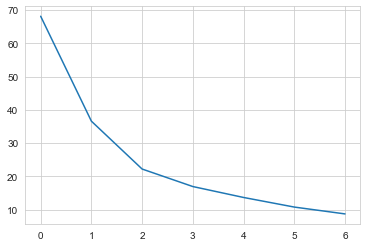

In [89]:
#wcss or elbow method
wcss = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(rfm_ds_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(wcss)

In [90]:
kmeans = KMeans(n_clusters =2, max_iter= 50)
kmeans.fit(rfm_ds_scaled)
lbs =kmeans.labels_
print(kmeans.labels_)

[0 1 1 ... 1 1 1]


In [91]:
retail_RFM['clusterID']= lbs
retail_RFM.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_concat,RFM_score,RFM_level,clusterID
CustomerID,,,,,,,,,,
12346.0,325,2,0.00,1,1,1,1.01.01.0,3,require activation,0
12347.0,2,151,3598.21,4,4,4,4.04.04.0,12,cannot be ignored,1
12348.0,75,14,904.44,2,1,3,2.01.03.0,6,potential customer,1
12349.0,18,73,1757.55,3,3,4,3.03.04.0,10,cannot be ignored,1
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,attention seeker,0
12352.0,36,95,1545.41,3,3,3,3.03.03.0,9,cannot be ignored,1
12353.0,204,4,89.00,1,1,1,1.01.01.0,3,require activation,0
12354.0,232,58,1079.40,1,3,3,1.03.03.0,7,loyal customer,0
12355.0,214,13,459.40,1,1,2,1.01.02.0,4,attention seeker,0


In [92]:
retail_RFM

,Recency,Frequency,Monetary,R,F,M,RFM_concat,RFM_score,RFM_level,clusterID
CustomerID,,,,,,,,,,
12346.0,325,2,0.00,1,1,1,1.01.01.0,3,require activation,0
12347.0,2,151,3598.21,4,4,4,4.04.04.0,12,cannot be ignored,1
12348.0,75,14,904.44,2,1,3,2.01.03.0,6,potential customer,1
12349.0,18,73,1757.55,3,3,4,3.03.04.0,10,cannot be ignored,1
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,attention seeker,0
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,1.01.01.0,3,require activation,0
18281.0,180,7,80.82,1,1,1,1.01.01.0,3,require activation,0
18282.0,7,13,176.60,4,1,1,4.01.01.0,6,potential customer,1


<AxesSubplot:xlabel='clusterID', ylabel='Recency'>

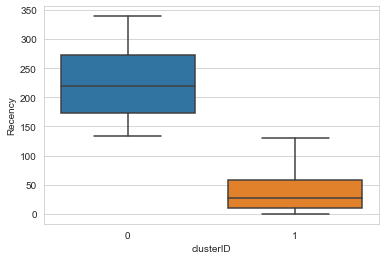

In [93]:
sns.boxplot(x='clusterID', y='Recency', data = retail_RFM)

<AxesSubplot:xlabel='clusterID', ylabel='Frequency'>

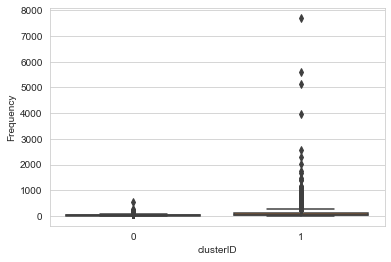

In [94]:
sns.boxplot(x='clusterID', y='Frequency', data = retail_RFM)

<AxesSubplot:xlabel='clusterID', ylabel='Monetary'>

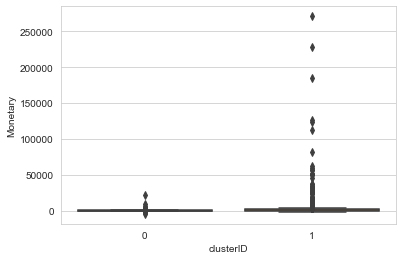

In [95]:
sns.boxplot(x='clusterID', y='Monetary', data = retail_RFM)